<a href="https://colab.research.google.com/github/Eternalstar69/InsightFit/blob/main/InsightFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv")

# Step 1: Check for Missing Values
print("Missing Values:\n", df.isnull().sum())
df.dropna(inplace=True)
print("After Dropping Missing Values:\n", df.isnull().sum())

# Step 2: Check for Duplicates
print("Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("After Dropping Duplicates:", df.duplicated().sum())

# Step 3: Check Data Types
print("Data Types:\n", df.dtypes)

# Step 4: Cleaning Numeric Data
df["Age"] = df["Age"].astype(int)  # Convert Age to integer
df["Height"] = df["Height"].round(2)  # Round Height to 2 decimals
df["Weight"] = df["Weight"].round(2)  # Round Weight to 2 decimals

# Apply ceiling or floor to specific columns
df["NCP"] = np.ceil(df["NCP"])  # Ceil up
df["FCVC"] = np.floor(df["FCVC"])  # Floor down
df["CH2O"] = np.ceil(df["CH2O"])  # Ceil up
df["TUE"] = np.ceil(df["TUE"])  # Ceil up
df["FAF"] = np.ceil(df["FAF"])  # Ceil up

# Step 5: Handle Categorical Variables
print("Categorical Columns:\n", df.select_dtypes(include=["object"]).columns)

# Step 6: Check for Outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 7: Check Class Distribution (Target Variable)
print("Class Distribution:\n", df["NObeyesdad"].value_counts())

# Step 8: Save the Cleaned Dataset
df.to_csv("InsightFit.csv", index=False)
print("Cleaned dataset saved as InsightFit.csv")


Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
After Dropping Missing Values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SM

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# data analysis
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
df = pd.read_csv('InsightFit.csv')

# เลือกคอลัมน์ที่เป็น Numerical Data
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC']

# สร้าง DataFrame เพื่อเก็บสถิติ
stats_df = pd.DataFrame(columns=['คอลัมน์', 'ค่าเฉลี่ย', 'มัธยฐาน', 'ส่วนเบี่ยงเบนมาตรฐาน', 'ค่าต่ำสุด', 'ค่าสูงสุด'])

# คำนวณสถิติสำหรับแต่ละคอลัมน์
all_stats = []  # Create an empty list to store data for each column
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()

    # Append data for the current column to the list
    all_stats.append({
        'column': col,
        'mean': mean,
        'median': median,
        'S.D.': std,
        'min': min_val,
        'max': max_val
    })

# Create the stats_df DataFrame using pd.DataFrame
stats_df = pd.DataFrame(all_stats)

# ปรับรูปแบบการแสดงผล
# Apply formatting to all columns except 'คอลัมน์'
for col in stats_df.columns[1:]:  # Start from the second column
    stats_df[col] = stats_df[col].map('{:.1f}'.format)

# แสดงผลลัพธ์ using to_string for better formatting
print(stats_df.to_string())

# 1. สถิติสำหรับ Gender
gender_stats = df['Gender'].value_counts(normalize=True) * 100
gender_counts = df['Gender'].value_counts()

print("Gender Statistics:")
for gender, percentage in gender_stats.items():
    count = gender_counts[gender]
    print(f"{gender} {percentage:.0f}% ({count} คน)")

# 2. สถิติสำหรับ NObeyesdad
nobeyesdad_stats = df['NObeyesdad'].value_counts(normalize=True) * 100
nobeyesdad_counts = df['NObeyesdad'].value_counts()

print("\nNObeyesdad Statistics:")
for category, percentage in nobeyesdad_stats.items():
    count = nobeyesdad_counts[category]
    print(f"{category}: {percentage:.0f}% ({count} คน)")

   column  mean median  S.D.   min    max
0     Age  24.0   22.0   6.3  14.0   61.0
1  Height   1.7    1.7   0.1   1.4    2.0
2  Weight  86.9   83.1  26.2  39.0  173.0
3    FCVC   2.2    2.0   0.6   1.0    3.0
Gender Statistics:
Male 50% (1052 คน)
Female 50% (1035 คน)

NObeyesdad Statistics:
Obesity_Type_I: 17% (351 คน)
Obesity_Type_III: 16% (324 คน)
Obesity_Type_II: 14% (297 คน)
Overweight_Level_II: 14% (290 คน)
Normal_Weight: 14% (282 คน)
Overweight_Level_I: 13% (276 คน)
Insufficient_Weight: 13% (267 คน)


In [13]:
import pandas as pd

# Read the cleaned dataset
df_cleaned = pd.read_csv('InsightFit.csv')

# Display 5 random rows with better formatting
random_rows = df_cleaned.sample(5)
random_rows.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
723,Female,19,1.570000,44.320000,no,no,2.000000,3.000000,Frequently,no,2.000000,yes,2.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
688,Male,17,1.820000,59.610000,yes,yes,2.000000,4.000000,Sometimes,no,2.000000,no,3.000000,1.000000,no,Automobile,Insufficient_Weight
854,Female,16,1.640000,67.440000,yes,yes,1.000000,2.000000,Sometimes,no,2.000000,yes,0.000000,1.000000,no,Public_Transportation,Overweight_Level_I
672,Female,27,1.660000,49.560000,yes,yes,2.000000,4.000000,Frequently,no,3.000000,no,2.000000,2.000000,no,Public_Transportation,Insufficient_Weight
1853,Female,21,1.750000,144.300000,yes,yes,3.000000,3.000000,Sometimes,no,3.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
# Detect outliers using IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier mask using 1.5 * IQR
outlier_mask = (df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))




In [15]:
# Import required libraries
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# Load dataset
df = pd.read_csv("InsightFit.csv")

# Show data overview
print(df.shape)
df.head()


(2087, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
# Create a new weight classification column
def weight_group(cat):
    if cat == 'Normal_Weight':
        return 'Normal'
    elif 'Overweight' in cat or 'Obesity' in cat:
        return 'Overweight_Obese'
    else:
        return 'Others'

df['WeightGroup'] = df['NObeyesdad'].apply(weight_group)

# Check distribution
df['WeightGroup'].value_counts()


,count
WeightGroup,
Overweight_Obese,1538
Normal,282
Others,267


In [18]:
# Chi-Square Test for Categorical Variables
categorical_vars = [ 'family_history_with_overweight', 'FAVC', 'CAEC',
                     'SCC', 'MTRANS']

chi_results = []

for var in categorical_vars:
    table = pd.crosstab(df[var], df['WeightGroup'])
    chi2, p, dof, expected = chi2_contingency(table)
    chi_results.append({
        'Variable': var,
        'Chi2 Statistic': round(chi2, 3),
        'Degrees of Freedom': dof,
        'p-value': p
    })

# Create DataFrame of results
chi_df = pd.DataFrame(chi_results).sort_values(by='p-value')
chi_df


,Variable,Chi2 Statistic,Degrees of Freedom,p-value
2,CAEC,639.787,6,6.077487e-135
0,family_history_with_overweight,535.239,2,5.948473e-117
1,FAVC,109.284,2,1.859396e-24
4,MTRANS,127.807,8,8.054960e-24
3,SCC,42.091,2,7.244604e-10


In [19]:
# Select only variables with significant association (p < 0.05)
significant_chi = chi_df[chi_df['p-value'] < 0.05]
significant_chi


,Variable,Chi2 Statistic,Degrees of Freedom,p-value
2,CAEC,639.787,6,6.077487e-135
0,family_history_with_overweight,535.239,2,5.948473e-117
1,FAVC,109.284,2,1.859396e-24
4,MTRANS,127.807,8,8.054960e-24
3,SCC,42.091,2,7.244604e-10


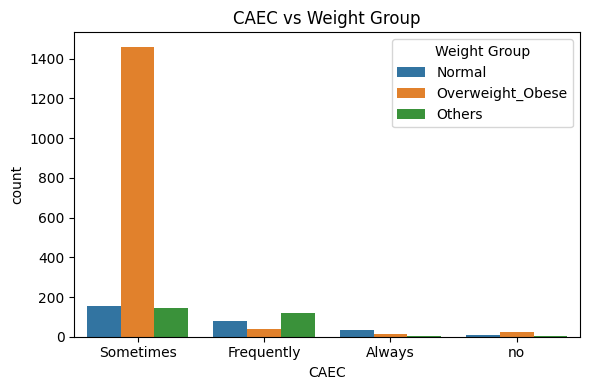

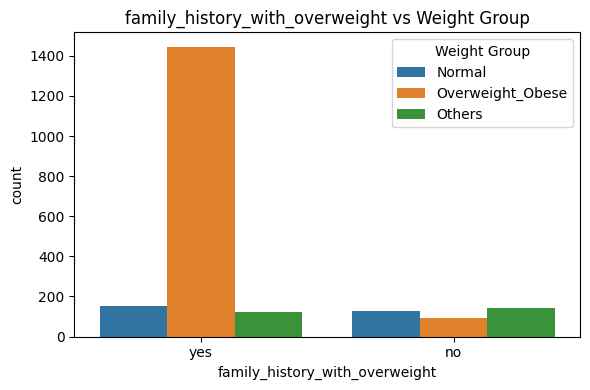

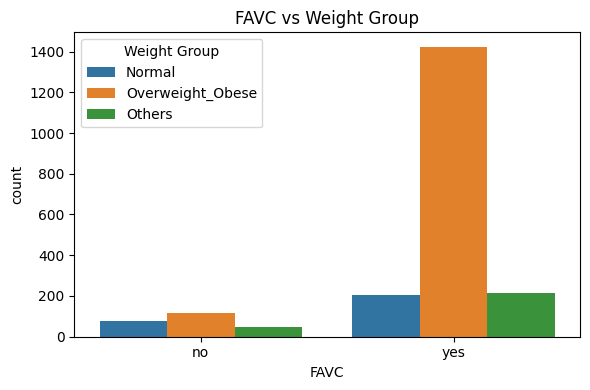

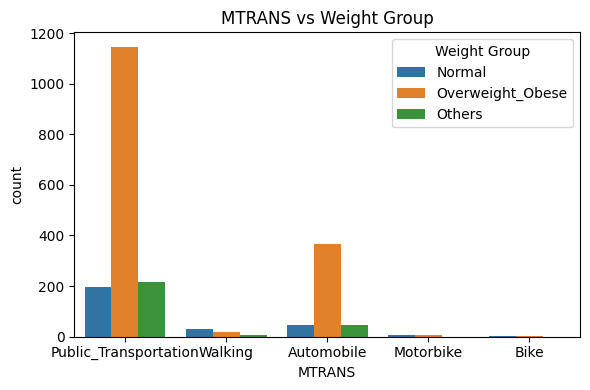

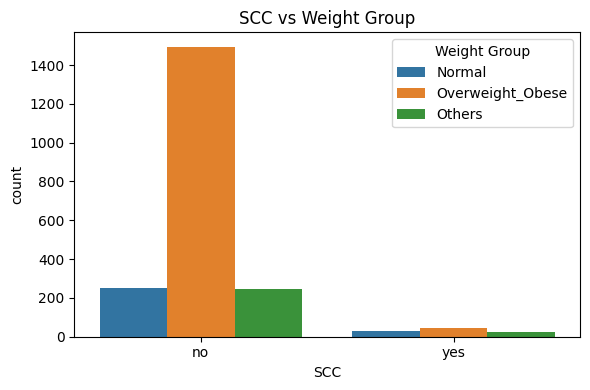

In [20]:
# Plot countplots for significant categorical variables
for var in significant_chi['Variable']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='WeightGroup', data=df)
    plt.title(f'{var} vs Weight Group')
    plt.legend(title='Weight Group')
    plt.tight_layout()
    plt.show()


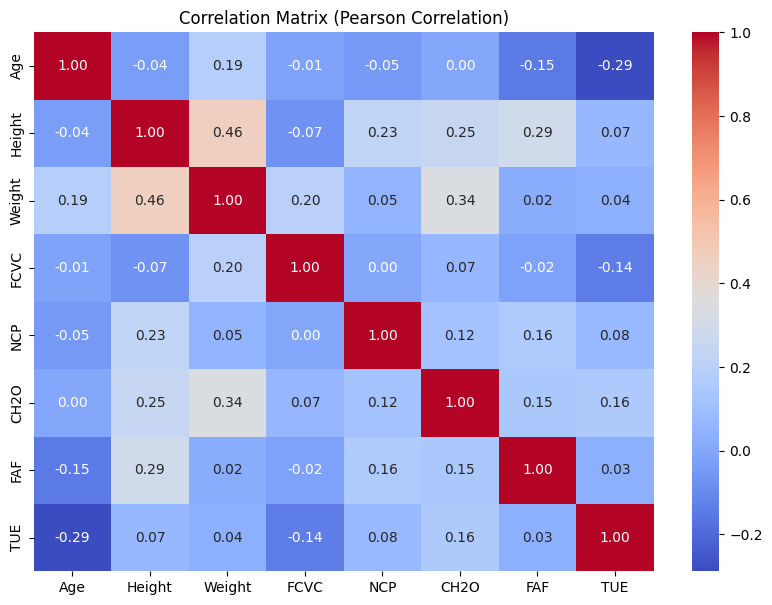

In [21]:
# Correlation analysis for numerical variables
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
corr_matrix = df[numerical_vars].corr()

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Pearson Correlation)')
plt.show()


In [22]:
# Convert NObeyesdad to numeric values
weight_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['WeightCategoryNum'] = df['NObeyesdad'].map(weight_mapping)

# Correlation with WeightCategoryNum
corr_with_target = df[numerical_vars + ['WeightCategoryNum']].corr()['WeightCategoryNum'].drop('WeightCategoryNum')
corr_with_target.sort_values(ascending=False)


,WeightCategoryNum
Weight,0.912452
CH2O,0.275018
Age,0.266617
FCVC,0.216074
Height,0.123923
TUE,0.020493
NCP,-0.024687
FAF,-0.106130


In [23]:
selected_qualitative = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS']
selected_quantitative = ['Age', 'Height', 'Weight', 'FCVC', 'FAF', 'CH2O', 'TUE', 'NCP']


Significant ANOVA Results:
   Variable  F-statistic  p-value
0      Age       71.572  0.00000
1   Height       28.913  0.00000
2   Weight      781.371  0.00000
3     FCVC       12.648  0.00039
5     CH2O      206.266  0.00000
7      TUE       41.487  0.00000


<ipython-input-24-afe8b6633563>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightGroup', y=var, data=df, palette="Set2")
<ipython-input-24-afe8b6633563>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightGroup', y=var, data=df, palette="Set2")
<ipython-input-24-afe8b6633563>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeightGroup', y=var, data=df, palette="Set2")
<ipython-input-24-afe8b6633563>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

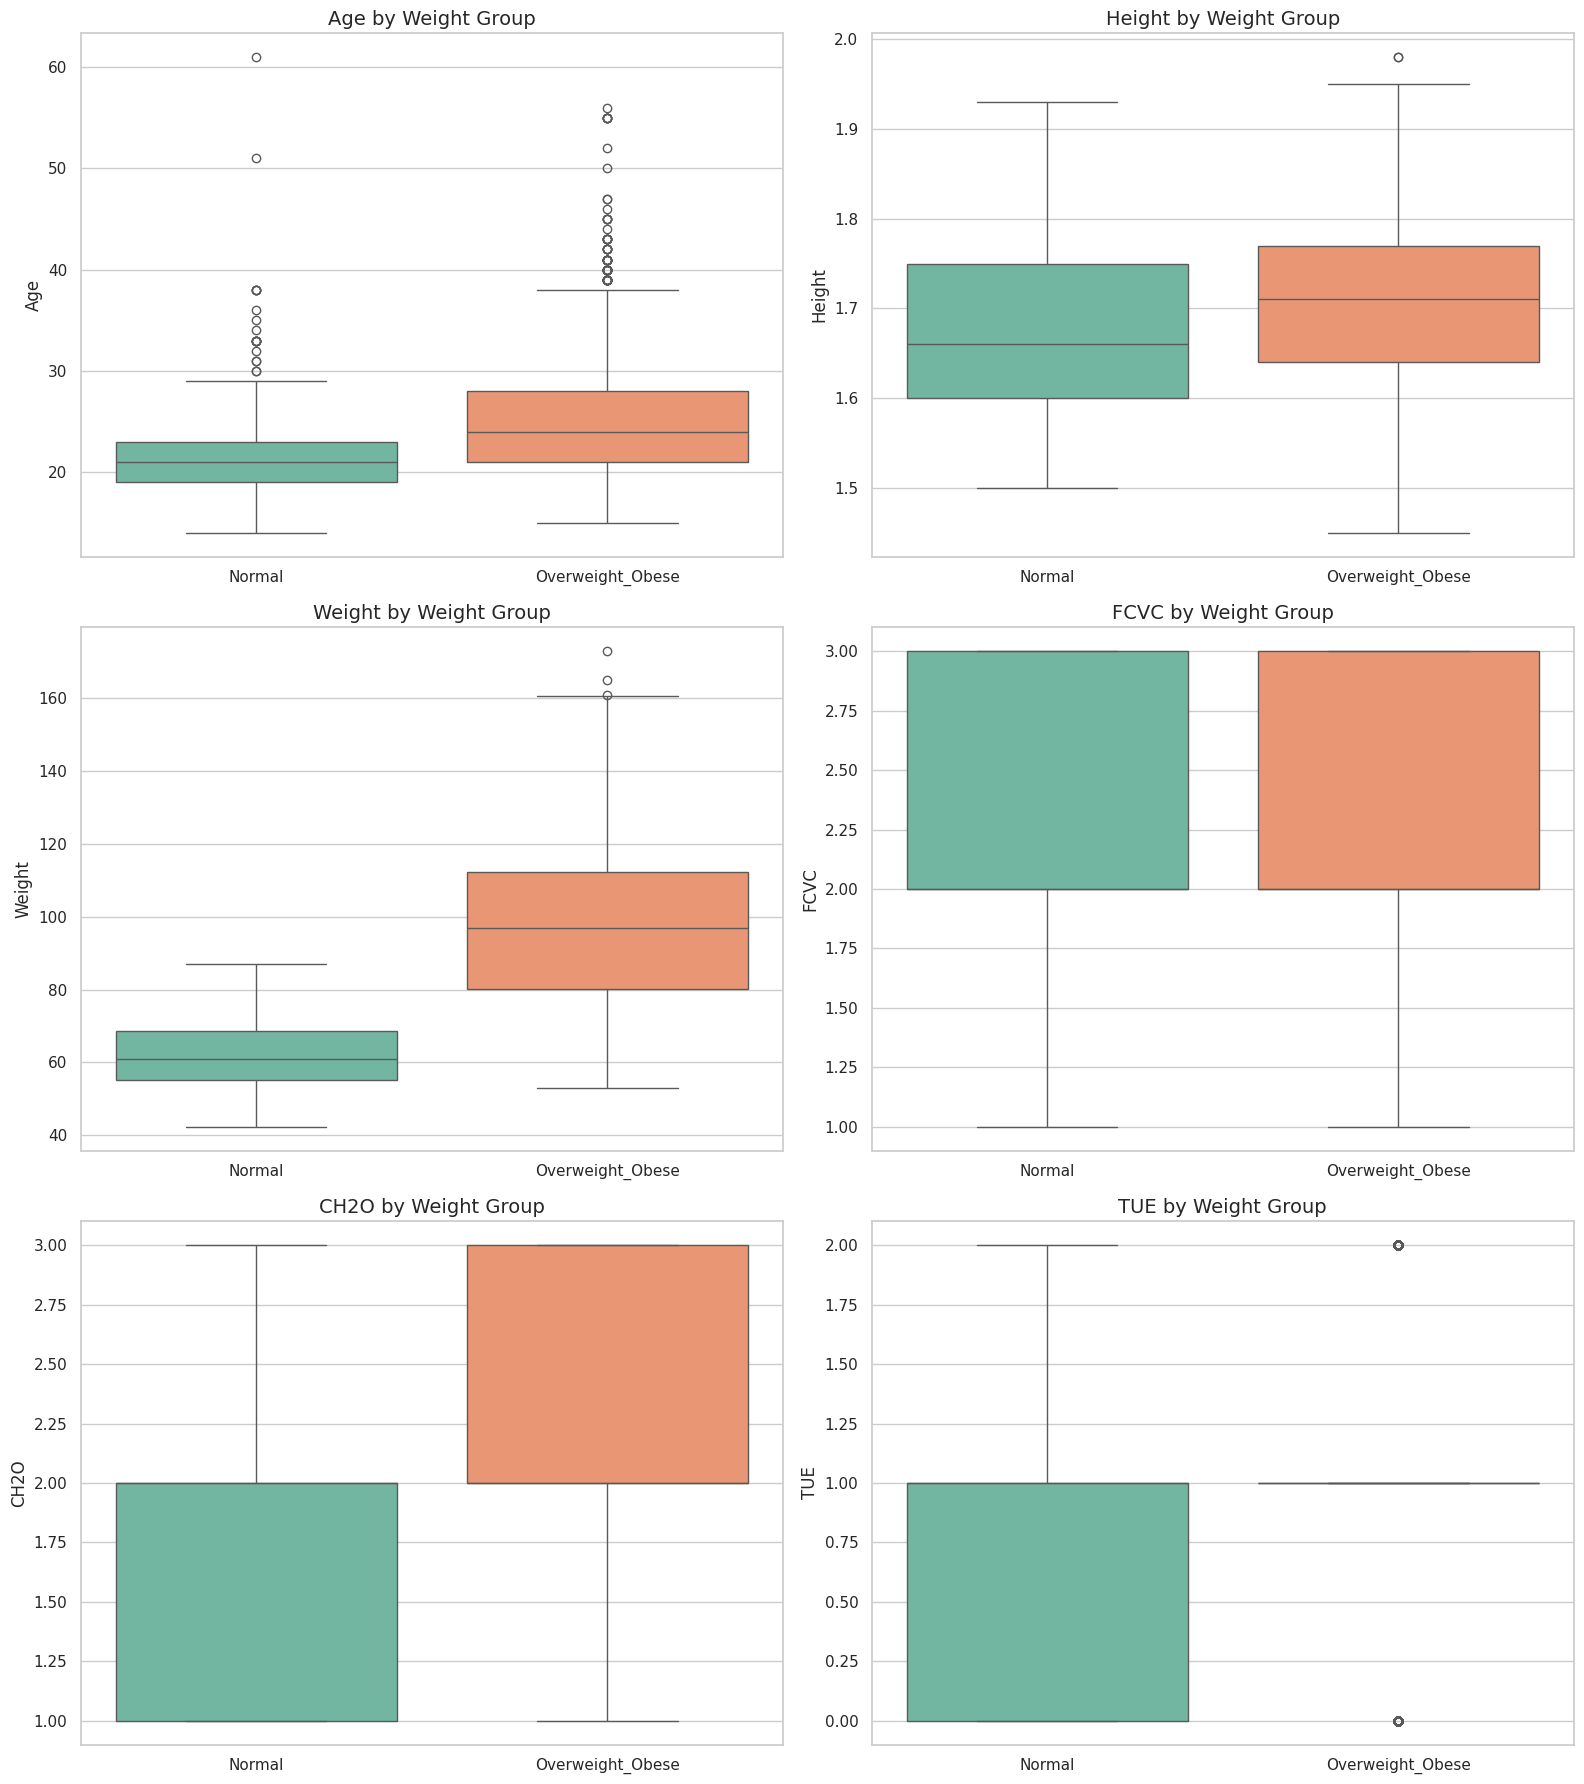

In [24]:
# Required libraries
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("InsightFit.csv")

# Grouping by weight category
def weight_group(cat):
    if cat == 'Normal_Weight':
        return 'Normal'
    elif 'Overweight' in cat or 'Obesity' in cat:
        return 'Overweight_Obese'
    else:
        return 'Others'

df['WeightGroup'] = df['NObeyesdad'].apply(weight_group)
df = df[df['WeightGroup'].isin(['Normal', 'Overweight_Obese'])]

# Define numerical variables
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# ANOVA test
anova_results = []

for var in numerical_vars:
    groups = [group[var].values for name, group in df.groupby("WeightGroup")]
    f_stat, p_val = f_oneway(*groups)
    anova_results.append({
        "Variable": var,
        "F-statistic": round(f_stat, 3),
        "p-value": round(p_val, 5)
    })

anova_df = pd.DataFrame(anova_results)
significant_anova = anova_df[anova_df["p-value"] < 0.05]
print("Significant ANOVA Results:\n", significant_anova)

#  Boxplot for significant variables
significant_vars = significant_anova['Variable'].tolist()

sns.set(style="whitegrid")
plt.figure(figsize=(16, 18))

for i, var in enumerate(significant_vars, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='WeightGroup', y=var, data=df, palette="Set2")
    plt.title(f"{var} by Weight Group", fontsize=14)
    plt.xlabel("")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


Numerical Statistics for Sample (n=25):
   column  mean median  S.D.   min    max
0     Age  23.8   22.0   6.8  16.0   38.0
1  Height   1.7    1.7   0.1   1.5    1.9
2  Weight  84.3   80.5  27.9  40.3  141.2
3    FCVC   2.0    2.0   0.5   1.0    3.0

Gender Statistics for Sample (n=25):
Male: 52% (13 people)
Female: 48% (12 people)

NObeyesdad Statistics for Sample (n=25):
Overweight_Level_I: 24% (6 people)
Obesity_Type_II: 16% (4 people)
Obesity_Type_I: 12% (3 people)
Insufficient_Weight: 12% (3 people)
Overweight_Level_II: 12% (3 people)
Obesity_Type_III: 12% (3 people)
Normal_Weight: 12% (3 people)

Chi-Square Test Results for Sample (n=25):
                         Variable  Chi2 Statistic  Degrees of Freedom   p-value
2                            CAEC          16.148                   6  0.012980
0  family_history_with_overweight           7.879                   2  0.019455
1                            FAVC           7.639                   2  0.021940
3                          

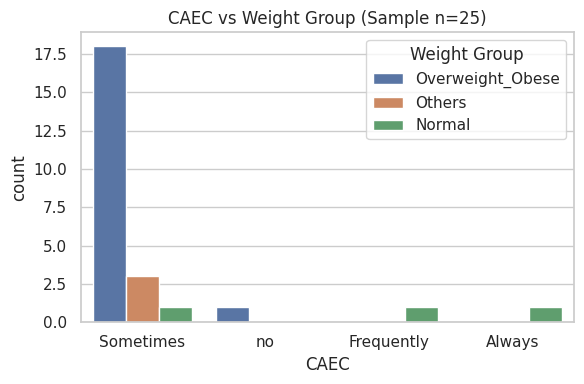

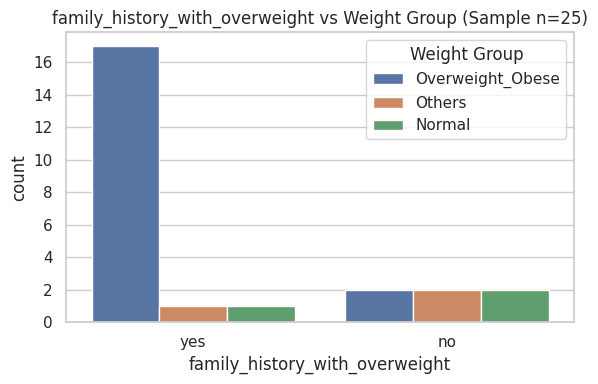

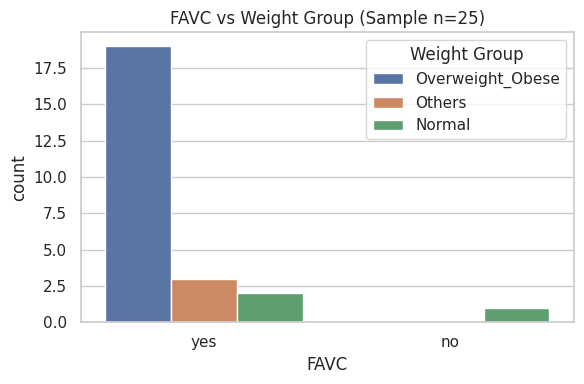


5 Random Rows from Sample (n=25):
      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP       CAEC SMOKE  CH2O SCC  FAF  TUE       CALC                 MTRANS          NObeyesdad       WeightGroup
1668    Male   30    1.78  120.79                            yes  yes   2.0  3.0  Sometimes    no   3.0  no  1.0  2.0  Sometimes             Automobile     Obesity_Type_II  Overweight_Obese
382   Female   16    1.61   65.00                            yes  yes   1.0  1.0  Sometimes    no   2.0  no  0.0  0.0         no  Public_Transportation  Overweight_Level_I  Overweight_Obese
297   Female   16    1.57   49.00                             no  yes   2.0  4.0     Always    no   2.0  no  0.0  1.0  Sometimes  Public_Transportation       Normal_Weight            Normal
1607    Male   29    1.91  129.68                            yes  yes   2.0  3.0  Sometimes    no   2.0  no  2.0  0.0  Sometimes  Public_Transportation     Obesity_Type_II  Overweight_Obese
840   Female   

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("InsightFit.csv")

# Set random seed for reproducibility and sample 25 rows
np.random.seed(42)
sample_df = df.sample(n=25)

# Data cleaning steps from original notebook applied to sample
sample_df["Age"] = sample_df["Age"].astype(int)
sample_df["Height"] = sample_df["Height"].round(2)
sample_df["Weight"] = sample_df["Weight"].round(2)

# Apply ceiling or floor to specific columns
sample_df["NCP"] = np.ceil(sample_df["NCP"])
sample_df["FCVC"] = np.floor(sample_df["FCVC"])
sample_df["CH2O"] = np.ceil(sample_df["CH2O"])
sample_df["TUE"] = np.ceil(sample_df["TUE"])
sample_df["FAF"] = np.ceil(sample_df["FAF"])

# Create weight classification column
def weight_group(cat):
    if cat == 'Normal_Weight':
        return 'Normal'
    elif 'Overweight' in cat or 'Obesity' in cat:
        return 'Overweight_Obese'
    else:
        return 'Others'

sample_df['WeightGroup'] = sample_df['NObeyesdad'].apply(weight_group)

# 1. Basic statistics for numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC']
stats_df = pd.DataFrame(columns=['column', 'mean', 'median', 'S.D.', 'min', 'max'])

all_stats = []
for col in numerical_columns:
    mean = sample_df[col].mean()
    median = sample_df[col].median()
    std = sample_df[col].std()
    min_val = sample_df[col].min()
    max_val = sample_df[col].max()

    all_stats.append({
        'column': col,
        'mean': mean,
        'median': median,
        'S.D.': std,
        'min': min_val,
        'max': max_val
    })

stats_df = pd.DataFrame(all_stats)
for col in stats_df.columns[1:]:
    stats_df[col] = stats_df[col].map('{:.1f}'.format)

print("Numerical Statistics for Sample (n=25):")
print(stats_df.to_string())

# 2. Statistics for Gender
print("\nGender Statistics for Sample (n=25):")
gender_stats = sample_df['Gender'].value_counts(normalize=True) * 100
gender_counts = sample_df['Gender'].value_counts()
for gender, percentage in gender_stats.items():
    count = gender_counts[gender]
    print(f"{gender}: {percentage:.0f}% ({count} people)")

# 3. Statistics for NObeyesdad
print("\nNObeyesdad Statistics for Sample (n=25):")
nobeyesdad_stats = sample_df['NObeyesdad'].value_counts(normalize=True) * 100
nobeyesdad_counts = sample_df['NObeyesdad'].value_counts()
for category, percentage in nobeyesdad_stats.items():
    count = nobeyesdad_counts[category]
    print(f"{category}: {percentage:.0f}% ({count} people)")

# 4. Chi-Square Test for Categorical Variables
categorical_vars = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS']

chi_results = []
for var in categorical_vars:
    table = pd.crosstab(sample_df[var], sample_df['WeightGroup'])
    chi2, p, dof, expected = chi2_contingency(table)
    chi_results.append({
        'Variable': var,
        'Chi2 Statistic': round(chi2, 3),
        'Degrees of Freedom': dof,
        'p-value': p
    })

# Create DataFrame of results
chi_df = pd.DataFrame(chi_results).sort_values(by='p-value')
print("\nChi-Square Test Results for Sample (n=25):")
print(chi_df.to_string())

# 5. Plot countplots for significant categorical variables
significant_chi = chi_df[chi_df['p-value'] < 0.05]
for var in significant_chi['Variable']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, hue='WeightGroup', data=sample_df)
    plt.title(f'{var} vs Weight Group (Sample n=25)')
    plt.legend(title='Weight Group')
    plt.tight_layout()
    plt.show()

# 6. Display 5 random rows from sample
print("\n5 Random Rows from Sample (n=25):")
random_rows = sample_df.sample(5)
print(random_rows.to_string())

